# Animació per exemplificar Teorema de Banach.

Si voleu podeu modificar el interval, x0 i també la funció. Vigileu que la funció no divergeixi dins l'interval d'estudi.
A més, l'interval s'emprarà per "plotar" la regió de l'espai d'interès. Seleccioneu-ho adequadament.


In [1]:
# %% Animacio Banach
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, Image # For GIF
from matplotlib import rc
from mpl_toolkits import mplot3d
import numpy as np

rc('animation', html='jshtml')

# Set initial values for the animation.
interval = (0.001, 2*np.pi)
x0 = 1.

# Define the function for which you want to find a fixed point.
def f(x):
    return 1- np.log(x) + x

In [2]:
# Define the function representing the iterative process.
def solve_Banach(x0, max_iterations=50, tolerance=1e-6):
    x = x0
    iterations = 0
    x_values = [x]
    for _ in range(max_iterations):
        try: #check if it overflows (diverges)
            x_next = f(x)
        except:
            break

        x_values.append(x_next) #store values
        if abs(x_next - x) < tolerance: #check for convergence
            break
        x = x_next
    return x_values




# Define the initialization function for the animation.
def init():
    # ax.clear()
    ax.set_xlim(interval[0], interval[-1])
    ax.set_ylim( f(interval[0]), f(interval[-1]))
    ax.set_xlabel('x')
    ax.set_ylabel('g(x)')
    ax.set_title('Mètode del Punt Fix')
    ax.grid(True)  # Add a grid
    ax.plot(np.linspace(interval[0], interval[-1], 100), [f(x) for x in np.linspace(interval[0], interval[-1], 100)], linestyle='-', color='g', label='g(x)')
    ax.plot(np.linspace(interval[0], interval[-1], 100), [x for x in np.linspace(interval[0], interval[-1], 100)], linestyle='--', color='gray', label='x')
    return ax,

# Define the update function for the animation.
amount_vertical = -1
amount_points = -1
amount_horizontal = -1
def update(frame):
    global amount_vertical, amount_points, amount_horizontal
    ax.clear()
    pre_valy_v = 0 #vertical lines

    if frame%3 == 0:
        amount_vertical += 1
    if frame%3 == 1: #add point
        amount_points += 1
    if frame%3 == 2: #add point
        amount_horizontal += 1

    if frame//3 > 0: #past things, if not in first iteration

        if amount_points >= 1:
            for x_val in x_values[:amount_points]:
                y_val = f(x_val)
                ax.plot(x_val, y_val , marker='o', linestyle='-', color='r', alpha= 0.5)


        if amount_vertical >= 1:
            for value in x_values[:amount_vertical]: #do not consider first point
                ax.plot([value, value], [pre_valy_v, f(value)], linestyle='--', color='blue', alpha = 0.5) #vertical line
                pre_valy_v = f(value)

        if amount_horizontal >= 1:
            for value in x_values[:amount_horizontal]: #do not consider first point
                yval= f(value)
                ax.plot([value, yval], [yval, yval], linestyle='--', color='blue', alpha = 0.5) #vertical line



    if amount_vertical >= 0:
        xval = x_values[amount_vertical]
        yval = f(xval)
        ax.plot([xval, xval], [pre_valy_v, yval], linestyle='--', color='blue') #vertical line
    if amount_points >= 0:
        xval = x_values[amount_points]
        yval = f(xval)
        ax.plot(xval, yval, marker='o', linestyle='-', color='r', label='Iteracions')
    if amount_horizontal >= 0:
        xval = x_values[amount_horizontal]
        yval = f(xval)
        ax.plot([xval, yval], [yval, yval], linestyle='--', color='blue') #vertical line

    ax.plot(np.linspace(interval[0], interval[-1], 100), [f(x) for x in np.linspace(interval[0], interval[-1], 100)], linestyle='-', color='g', label='g(x)')
    ax.plot(np.linspace(interval[0], interval[-1], 100), [x for x in np.linspace(interval[0], interval[-1], 100)], linestyle='-', color='gray', label='x')
    ax.set_xlabel('x')
    ax.set_ylabel('g(x)')
    ax.set_title('Mètode del Punt Fix')
    ax.text(0.1, 0.85, 'Iteració {}'.format(frame//3), transform=ax.transAxes,color="black")
    ax.legend(loc="lower right")
    ax.grid(True)  # Add a grid
    return ax,

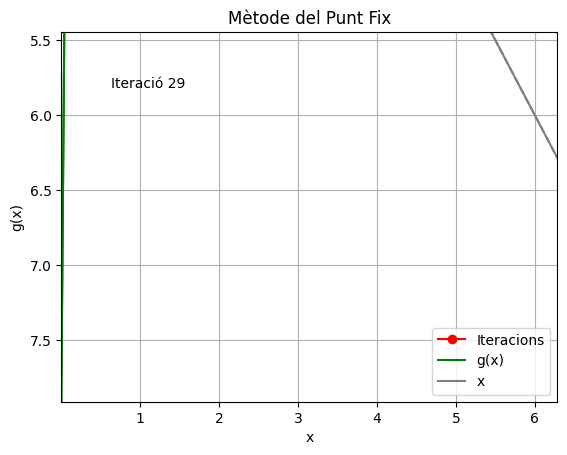

In [4]:
x_values = solve_Banach(x0)
iterations = len(x_values)
# Create a figure and axis for the animation.
fig, ax = plt.subplots()

#%% Create the animation.
ani = animation.FuncAnimation(fig, update, frames=list( range(iterations*3)), init_func=init, interval = 300)

# Display the animation (this may not work in all Python environments).
ani
# %%

# Animació per exemplificar el mètode de Newton-Raphson.

Si voleu podeu modificar el interval, x0 i també la funció. Vigileu que la funció no divergeixi dins l'interval d'estudi.
A més, l'interval s'emprarà per "plotar" la regió de l'espai d'interès. Seleccioneu-ho adequadament.

In [5]:
# %% Animació NR
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# Set initial values for the animation.
interval = (0.1, 2*np.pi)
x0 = 1.0

# Define the function for which you want to find a fixed point.
def f(x):
    return 1- np.log(x)

# Define the derivative of the function (f'(x)).
def df(x):
    return - 1/x


In [6]:
# Define the Newton-Raphson iteration.
def newton_raphson(x0, max_iterations=50, tolerance=1e-6):
    x = x0
    x_values = [x]
    for _ in range(max_iterations):
        try: #check if overflows (diverges)
            x_next = x - f(x) / df(x)
        except:
            break
        x_values.append(x_next)
        if abs(x_next - x) < tolerance:
            break
        x = x_next
    return x_values

# Define the initialization function for the animation.
def init():
    # ax.clear()
    ax.set_xlim(interval[0], interval[-1])
    ax.set_ylim( f(interval[0]), f(interval[-1]))
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title('Newton-Raphson')
    ax.grid(True)  # Add a grid
    ax.plot(np.linspace(interval[0], interval[-1], 100), [f(x) for x in np.linspace(interval[0], interval[-1], 100)], linestyle='-', color='g', label='g(x)')
    ax.plot(np.linspace(interval[0], interval[-1], 100), [0 for x in np.linspace(interval[0], interval[-1], 100)], linestyle='-', color='black')
    return ax,

# Define the update function for the animation.
amount_vertical = -1
amount_points = -1
amount_diagonal = -1
def update(frame):
    global amount_vertical, amount_points, amount_diagonal
    ax.clear()
    prev_x = x0
    if frame%3 == 0:
        amount_vertical += 1
    if frame%3 == 1: #add point
        amount_points += 1
    if frame%3 == 2: #add point
        amount_diagonal += 1

    if frame//3 > 0: #past things, if not in first iteration

        if amount_points >= 1:
            for x_val in x_values[:amount_points]:
                y_val = f(x_val)
                ax.plot(x_val, y_val , marker='o', linestyle='-', color='r', alpha= 0.5)


        if amount_vertical >= 1:
            for value in x_values[:amount_vertical]: #do not consider first point
                ax.plot([value, value], [0, f(value)], linestyle='--', color='blue', alpha = 0.5) #vertical line

        if amount_diagonal >= 1: #TODO: Esta mal
            if amount_diagonal + 1 < len(x_values):
                tmp_amount_diagonal = amount_diagonal + 1
            else:
                tmp_amount_diagonal = amount_diagonal
            for value in x_values[1:tmp_amount_diagonal]: #do not consider first point
                ax.plot([prev_x, value], [f(prev_x), 0], linestyle='--', color='blue', alpha = 0.5) #vertical line
                prev_x = value



    if amount_vertical >= 0:
        xval = x_values[amount_vertical]
        yval = f(xval)
        ax.plot([xval, xval], [0, yval], linestyle='--', color='blue') #vertical line
    if amount_points >= 0:
        xval = x_values[amount_points]
        yval = f(xval)
        ax.plot(xval, yval, marker='o', linestyle='-', color='r', label='Iteracions')
    if amount_diagonal >= 0:
        value = x_values[amount_diagonal+1]
        ax.plot([prev_x, value], [f(prev_x), 0], linestyle='--', color='blue') #vertical line
        prev_x = value

    ax.plot(np.linspace(interval[0], interval[-1], 100), [f(x) for x in np.linspace(interval[0], interval[-1], 100)], linestyle='-', color='g', label='f(x)')
    ax.plot(np.linspace(interval[0], interval[-1], 100), [0 for x in np.linspace(interval[0], interval[-1], 100)], linestyle='-', color='black')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title('Newton-Raphson')
    ax.text(0.1, 0.85, 'Iteració {}'.format(frame//3), transform=ax.transAxes,color="black")
    ax.legend(loc="lower right")
    ax.grid(True)  # Add a grid
    return ax,

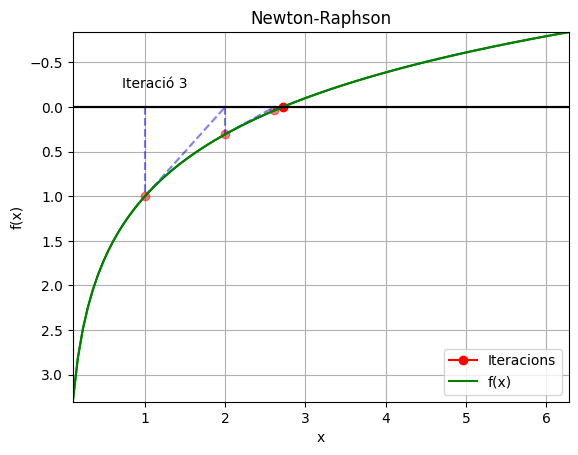

In [7]:
x_values = newton_raphson(x0)
iterations = len(x_values)
# Create a figure and axis for the animation.
fig, ax = plt.subplots()



#%% Create the animation.
ani = animation.FuncAnimation(fig, update, frames=list( range(iterations*2 -1)), init_func=init, interval = 300)

# Display the animation (this may not work in all Python environments).
ani